In [24]:
import pandas
import yfinance as yf
import pandas as pd
from pandas_datareader import data
from datetime import datetime

In [25]:
yf.pdr_override() #以pandasreader常用的格式覆寫

In [26]:
target_stock = 'AAPL'  #股票代號變數

In [27]:
start_date = datetime(2014, 1, 1)
end_date = datetime(2021, 5, 30) #設定資料起訖日期

In [28]:
df = data.get_data_yahoo([target_stock], start_date, end_date) 

[*********************100%***********************]  1 of 1 completed


In [34]:
df.index

DatetimeIndex(['2013-12-31', '2014-01-02', '2014-01-03', '2014-01-06',
               '2014-01-07', '2014-01-08', '2014-01-09', '2014-01-10',
               '2014-01-13', '2014-01-14',
               ...
               '2021-05-17', '2021-05-18', '2021-05-19', '2021-05-20',
               '2021-05-21', '2021-05-24', '2021-05-25', '2021-05-26',
               '2021-05-27', '2021-05-28'],
              dtype='datetime64[ns]', name='Date', length=1866, freq=None)

# 回測

In [2]:
import sys, setuptools, tokenize

In [3]:
from backtesting import Backtest, Strategy #引入回測和交易策略功能

from backtesting.lib import crossover #從lib子模組引入判斷均線交會功能
from backtesting.test import SMA #從test子模組引入繪製均線功能

import pandas as pd #引入pandas讀取股價歷史資料CSV檔

/opt/homebrew/Caskroom/miniforge/base/envs/stock_dl/lib/python3.8/site-packages/backtesting/_plotting.py:45: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [8]:
import backtesting

In [8]:
class SmaCross(Strategy): #交易策略命名為SmaClass，使用backtesting.py的Strategy功能
    n1 = 5 #設定第一條均線日數為5日(周線)
    n2 = 20 #設定第二條均線日數為20日(月線)，這邊的日數可自由調整

    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, self.n1) #定義第一條均線為sma1，使用backtesting.py的SMA功能算繪
        self.sma2 = self.I(SMA, self.data.Close, self.n2) #定義第二條均線為sma2，使用backtesting.py的SMA功能算繪
    
    def next(self):
        if crossover(self.sma1, self.sma2): #如果周線衝上月線，表示近期是上漲的，則買入
            self.buy()
        elif crossover(self.sma2, self.sma1): #如果周線再與月線交叉，表示開始下跌了，則賣出
            self.sell()

In [9]:
#回測
df = df.interpolate()
df.index = pd.to_datetime(df.index)

In [11]:
test = Backtest(df, SmaCross, cash=10000, commission=.002)

In [12]:
result = test.run()

In [13]:
print(result) # 直接print文字結果

Start                     2013-12-31 00:00:00
End                       2021-05-28 00:00:00
Duration                   2705 days 00:00:00
Exposure Time [%]                   98.338692
Equity Final [$]                 64671.021741
Equity Peak [$]                  73729.873784
Return [%]                         546.710217
Buy & Hold Return [%]              521.917229
Return (Ann.) [%]                   28.672256
Volatility (Ann.) [%]               37.282891
Sharpe Ratio                         0.769046
Sortino Ratio                        1.487584
Calmar Ratio                         0.740378
Max. Drawdown [%]                  -38.726491
Avg. Drawdown [%]                    -4.01002
Max. Drawdown Duration      721 days 00:00:00
Avg. Drawdown Duration       31 days 00:00:00
# Trades                                    1
Win Rate [%]                            100.0
Best Trade [%]                     546.845392
Worst Trade [%]                    546.845392
Avg. Trade [%]                    

In [14]:
test.plot() #將線圖網頁依照指定檔名保存

# ML測試

## load data

In [15]:
target_stock = 'AAPL'  #股票代號變數
start_date = datetime(2010, 1, 1)
end_date = datetime(2021, 5, 30) #設定資料起訖日期
df = data.get_data_yahoo([target_stock], start_date, end_date) 

[*********************100%***********************]  1 of 1 completed


#  ML產生預測資料

In [16]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## 標準化

In [17]:
def format_data(df):
    data_to_use = df['Close'].values
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_to_use.reshape(-1, 1))
    return scaled_data

In [20]:
scaled_data = format_data(df)

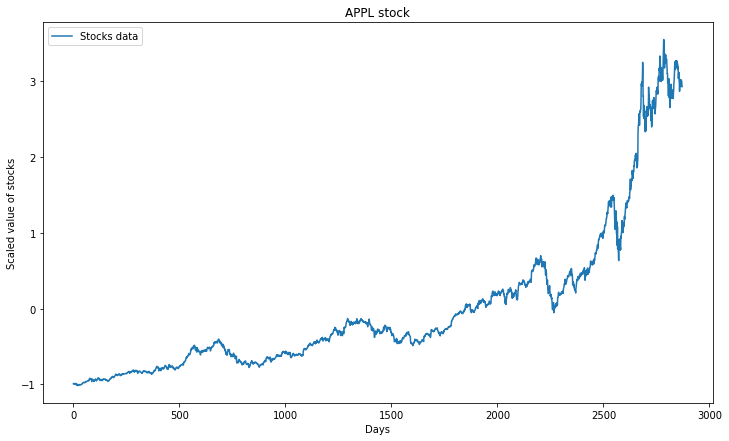

In [21]:
plt.figure(figsize=(12,7), frameon=False, facecolor='brown', edgecolor='blue')
plt.title('APPL stock')
plt.xlabel('Days')
plt.ylabel('Scaled value of stocks')
plt.plot(scaled_data, label='Stocks data')
plt.legend()
plt.show()

In [22]:
def window_data(data, window_size):
    X = []
    y = []
    
    i = 0
    while (i + window_size) <= len(data) - 1:
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
        
        i += 1
    assert len(X) ==  len(y)
    return X, y

In [23]:
X, y = window_data(scaled_data, 7)


## 切分訓練與測試

In [24]:
X_train  = np.array(X[:2600])
y_train = np.array(y[:2600])

X_test = np.array(X[2600:])
y_test = np.array(y[2600:])

print("X_train size: {}".format(X_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(X_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (2600, 7, 1)
y_train size: (2600, 1)
X_test size: (265, 7, 1)
y_test size: (265, 1)


## Hyperparameters

In [25]:
batch_size = 7 
window_size = 7
hidden_layer = 256 
clip_margin = 4  
learning_rate = 0.001 
epochs = 50

In [30]:
tf.compat.v1.disable_eager_execution()
inputs = tf.compat.v1.placeholder(tf.float32, [batch_size, window_size, 1])
targets = tf.compat.v1.placeholder(tf.float32, [batch_size, 1])

## 建構網路

In [31]:
# LSTM weights
#Weights for the input gate
weights_input_gate = tf.Variable(tf.compat.v1.truncated_normal([1, hidden_layer], stddev=0.05))
weights_input_hidden = tf.Variable(tf.compat.v1.truncated_normal([hidden_layer, hidden_layer], stddev=0.05))
bias_input = tf.Variable(tf.zeros([hidden_layer]))

#weights for the forgot gate
weights_forget_gate = tf.Variable(tf.compat.v1.truncated_normal([1, hidden_layer], stddev=0.05))
weights_forget_hidden = tf.Variable(tf.compat.v1.truncated_normal([hidden_layer, hidden_layer], stddev=0.05))
bias_forget = tf.Variable(tf.zeros([hidden_layer]))

#weights for the output gate
weights_output_gate = tf.Variable(tf.compat.v1.truncated_normal([1, hidden_layer], stddev=0.05))
weights_output_hidden = tf.Variable(tf.compat.v1.truncated_normal([hidden_layer, hidden_layer], stddev=0.05))
bias_output = tf.Variable(tf.zeros([hidden_layer]))

#weights for the memory cell
weights_memory_cell = tf.Variable(tf.compat.v1.truncated_normal([1, hidden_layer], stddev=0.05))
weights_memory_cell_hidden = tf.Variable(tf.compat.v1.truncated_normal([hidden_layer, hidden_layer], stddev=0.05))
bias_memory_cell = tf.Variable(tf.zeros([hidden_layer]))

## Output layer weigts
weights_output = tf.Variable(tf.compat.v1.truncated_normal([hidden_layer, 1], stddev=0.05))
bias_output_layer = tf.Variable(tf.zeros([1]))

In [32]:
def LSTM_cell(input, output, state):
    
    input_gate = tf.sigmoid(tf.matmul(input, weights_input_gate) + tf.matmul(output, weights_input_hidden) + bias_input)
    
    forget_gate = tf.sigmoid(tf.matmul(input, weights_forget_gate) + tf.matmul(output, weights_forget_hidden) + bias_forget)
    
    output_gate = tf.sigmoid(tf.matmul(input, weights_output_gate) + tf.matmul(output, weights_output_hidden) + bias_output)
    
    memory_cell = tf.tanh(tf.matmul(input, weights_memory_cell) + tf.matmul(output, weights_memory_cell_hidden) + bias_memory_cell)
    
    state = state * forget_gate + input_gate * memory_cell
    
    output = output_gate * tf.tanh(state)
    return state, output

In [33]:
outputs = []
for i in range(batch_size): #Iterates through every window in the batch
    #for each batch I am creating batch_state as all zeros and output for that window which is all zeros at the beginning as well.
    batch_state = np.zeros([1, hidden_layer], dtype=np.float32) 
    batch_output = np.zeros([1, hidden_layer], dtype=np.float32)
    #for each point in the window we are feeding that into LSTM to get next output
    for ii in range(window_size):
        batch_state, batch_output = LSTM_cell(tf.reshape(inputs[i][ii], (-1, 1)), batch_state, batch_output)
    #last output is conisdered and used to get a prediction
    outputs.append(tf.matmul(batch_output, weights_output) + bias_output_layer)

In [34]:
losses = []

for i in range(len(outputs)):
    losses.append(tf.losses.mean_squared_error(tf.reshape(targets[i], (-1, 1)), outputs[i]))
    
loss = tf.reduce_mean(losses)

In [35]:
gradients = tf.gradients(loss, tf.compat.v1.trainable_variables())
clipped, _ = tf.clip_by_global_norm(gradients, clip_margin)
optimizer = tf.optimizers.Adam(learning_rate)
trained_optimizer = optimizer.apply_gradients(zip(gradients, tf.compat.v1.trainable_variables()))

In [36]:
session = tf.compat.v1.Session()
session.run(tf.compat.v1.global_variables_initializer())

In [37]:
for i in range(epochs):
    traind_scores = []
    ii = 0
    epoch_loss = []
    while(ii + batch_size) <= len(X_train):
        X_batch = X_train[ii:ii+batch_size]
        y_batch = y_train[ii:ii+batch_size]
        
        o, c, _ = session.run([outputs, loss, trained_optimizer], feed_dict={inputs:X_batch, targets:y_batch})
        
        epoch_loss.append(c)
        traind_scores.append(o)
        ii += batch_size
    if (i % 10) == 0:
        print('Epoch {}/{}'.format(i, epochs), ' Current loss: {}'.format(np.mean(epoch_loss)))

Epoch 0/50  Current loss: 0.02158028818666935
Epoch 10/50  Current loss: 0.030072666704654694
Epoch 20/50  Current loss: 0.020591124892234802
Epoch 30/50  Current loss: 0.011255351826548576
Epoch 40/50  Current loss: 0.006794435437768698


In [38]:

sup =[]
for i in range(len(traind_scores)):
    for j in range(len(traind_scores[i])):
        sup.append(traind_scores[i][j][0])

In [39]:
tests = []
i = 0
while i+batch_size <= len(X_test):
    
    o = session.run([outputs], feed_dict={inputs:X_test[i:i+batch_size]})
    i += batch_size
    tests.append(o)

In [40]:
tests_new = []
for i in range(len(tests)):
    for j in range(len(tests[i][0])):
        tests_new.append(tests[i][0][j])

In [41]:
len(tests_new)

259

In [42]:
test_results = []
for i in range(2860):
    if i >= 2601:
        test_results.append(tests_new[i-2601])
    else:
        test_results.append(None)

/opt/homebrew/Caskroom/miniforge/base/envs/stock_dl/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


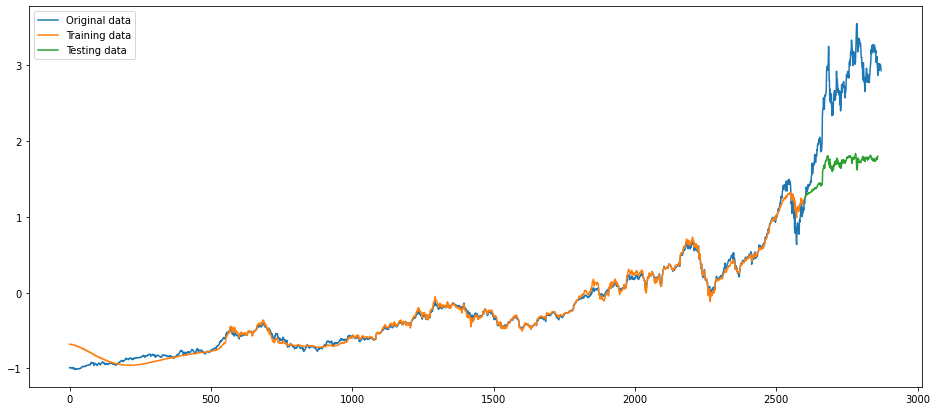

In [43]:
plt.figure(figsize=(16, 7))
plt.plot(scaled_data, label='Original data')
plt.plot(sup, label='Training data')
plt.plot(test_results, label='Testing data')
plt.legend()
plt.show()

In [ ]:
scaled_data

## 回測

In [15]:
class ml_back_test(Strategy): #交易策略命名為SmaClass，使用backtesting.py的Strategy功能
    n1 = 5 #設定第一條均線日數為5日(周線)
    n2 = 20 #設定第二條均線日數為20日(月線)，這邊的日數可自由調整

    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, self.n1) #定義第一條均線為sma1，使用backtesting.py的SMA功能算繪
        self.sma2 = self.I(SMA, self.data.Close, self.n2) #定義第二條均線為sma2，使用backtesting.py的SMA功能算繪
    
    def next(self):
        if crossover(self.sma1, self.sma2): #如果周線衝上月線，表示近期是上漲的，則買入
            self.buy()
        elif crossover(self.sma2, self.sma1): #如果周線再與月線交叉，表示開始下跌了，則賣出
            self.sell()

In [25]:
ml_back_test.I

<function backtesting.backtesting.Strategy.I(self, func: Callable, *args, name=None, plot=True, overlay=None, color=None, scatter=False, **kwargs) -> numpy.ndarray>

In [26]:
ml_back_test.crossover

AttributeError: type object 'ml_back_test' has no attribute 'crossover'

In [30]:
from backtesting.test import SMA

In [31]:
SMA

<function backtesting.test.SMA(arr: pandas.core.series.Series, n: int) -> pandas.core.series.Series>

In [20]:
!pip install pyspark[sql]

zsh:1: no matches found: pyspark[sql]


In [19]:
import pyspark

ModuleNotFoundError: No module named 'pyspark'

In [21]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

Exception: Java gateway process exited before sending its port number

In [44]:
def aa(aaa,b):
    aaa = aaa
#     global aaa
    print(a+b)

In [39]:
aa(3,6)

9


In [45]:
aaa

NameError: name 'aaa' is not defined